In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import math
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [2]:
df = pd.read_csv(Path('../Resources/Income_All.csv'))
df.head()

,id,year,expenditures,expenditure_amount,income_amount
0,1,2019,Accommodation services,24927,24971
1,2,2019,Actual rentals for housing,45046,45048
2,3,2019,Alcoholic beverages,20762,20710
3,4,2019,Alcoholic beverages and tobacco,25032,25036
4,5,2019,All groups,21318,21318


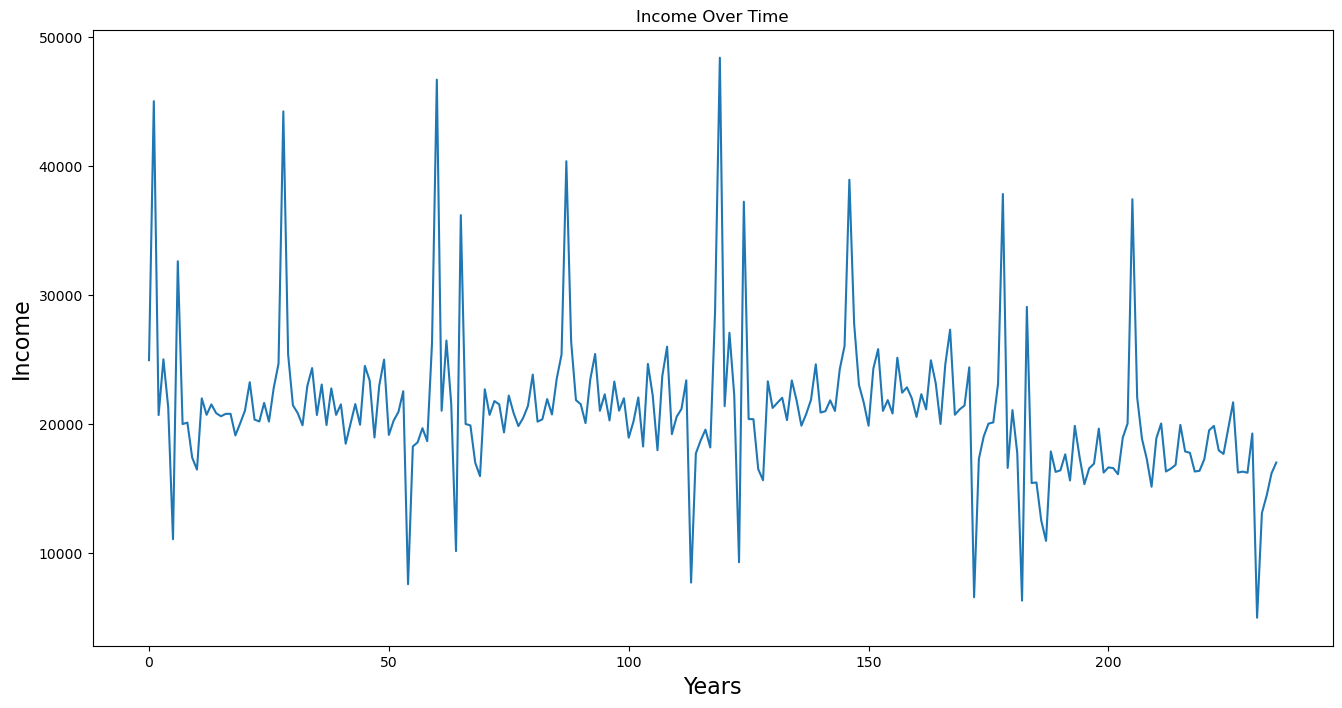

In [3]:
plt.figure(figsize=(16,8))
plt.title('Income Over Time')
plt.plot(df['income_amount'])
plt.ylabel('Income', fontsize=16)
plt.xlabel('Years',fontsize=16)
plt.show()

In [4]:
# Create a new DF with the income column
data = df.filter(['income_amount'])

# Convert the DF to a numpy array

dataset = data.values

# Get the number of rows to train the model on

training_data_len = math.ceil(len(dataset) * .8)

training_data_len

189

In [5]:
# Scale the Data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.45997052],
       [0.92238242],
       [0.3618315 ],
       [0.46146759],
       [0.37583491],
       [0.14010318],
       [0.63653324],
       [0.34575522],
       [0.34844995],
       [0.28584919],
       [0.26452163],
       [0.391773  ],
       [0.3623382 ],
       [0.38094799],
       [0.36526325],
       [0.35978166],
       [0.36408863],
       [0.36408863],
       [0.32560228],
       [0.34695288],
       [0.36982358],
       [0.42051684],
       [0.35383942],
       [0.3504307 ],
       [0.38359666],
       [0.35031554],
       [0.41042885],
       [0.4536828 ],
       [0.9041872 ],
       [0.47017366],
       [0.37935879],
       [0.36540145],
       [0.34359022],
       [0.41369939],
       [0.44582892],
       [0.36201575],
       [0.41641715],
       [0.34409692],
       [0.40950758],
       [0.36224607],
       [0.38106315],
       [0.31072366],
       [0.34626192],
       [0.38154682],
       [0.34467272],
       [0.44974435],
       [0.42360311],
       [0.321

In [6]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
# Split the Data into x_train and y_train data set
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.45997052, 0.92238242, 0.3618315 , 0.46146759, 0.37583491,
       0.14010318, 0.63653324, 0.34575522, 0.34844995, 0.28584919,
       0.26452163, 0.391773  , 0.3623382 , 0.38094799, 0.36526325,
       0.35978166, 0.36408863, 0.36408863, 0.32560228, 0.34695288,
       0.36982358, 0.42051684, 0.35383942, 0.3504307 , 0.38359666,
       0.35031554, 0.41042885, 0.4536828 , 0.9041872 , 0.47017366,
       0.37935879, 0.36540145, 0.34359022, 0.41369939, 0.44582892,
       0.36201575, 0.41641715, 0.34409692, 0.40950758, 0.36224607,
       0.38106315, 0.31072366, 0.34626192, 0.38154682, 0.34467272,
       0.44974435, 0.42360311, 0.32177899, 0.41482795, 0.46091483,
       0.3264775 , 0.3520199 , 0.36756645, 0.40446359, 0.05985997,
       0.3058409 , 0.31323414, 0.33847713, 0.31526095, 0.49124787])]
[0.9607536044958312]

[array([0.45997052, 0.92238242, 0.3618315 , 0.46146759, 0.37583491,
       0.14010318, 0.63653324, 0.34575522, 0.34844995, 0.28584919,
       0.26452163, 0.391773  , 0.362

In [7]:
# Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [8]:
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(129, 60, 1)

In [9]:
# Build the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [10]:
# Complite the model
model.compile(optimizer = 'adam', loss ='mean_squared_error')

In [11]:
# Train the model
model.fit(x_train, y_train, batch_size = 1, epochs = 320)

Epoch 1/320
129/129 [==============================] - 7s 19ms/step - loss: 0.0291
Epoch 2/320
129/129 [==============================] - 2s 19ms/step - loss: 0.0217
Epoch 3/320
129/129 [==============================] - 3s 20ms/step - loss: 0.0214
Epoch 4/320
129/129 [==============================] - 3s 19ms/step - loss: 0.0228
Epoch 5/320
129/129 [==============================] - 3s 19ms/step - loss: 0.0205
Epoch 6/320
129/129 [==============================] - 3s 19ms/step - loss: 0.0212
Epoch 7/320
129/129 [==============================] - 2s 19ms/step - loss: 0.0200
Epoch 8/320
129/129 [==============================] - 2s 19ms/step - loss: 0.0212
Epoch 9/320
129/129 [==============================] - 3s 19ms/step - loss: 0.0216
Epoch 10/320
129/129 [==============================] - 3s 20ms/step - loss: 0.0207
Epoch 11/320
129/129 [==============================] - 2s 19ms/step - loss: 0.0209
Epoch 12/320
129/129 [==============================] - 2s 19ms/step - loss: 0.0205
E

129/129 [==============================] - 2s 18ms/step - loss: 0.0085
Epoch 99/320
129/129 [==============================] - 2s 18ms/step - loss: 0.0088
Epoch 100/320
129/129 [==============================] - 2s 18ms/step - loss: 0.0089
Epoch 101/320
129/129 [==============================] - 2s 18ms/step - loss: 0.0078
Epoch 102/320
129/129 [==============================] - 2s 18ms/step - loss: 0.0072
Epoch 103/320
129/129 [==============================] - 2s 18ms/step - loss: 0.0083
Epoch 104/320
129/129 [==============================] - 2s 15ms/step - loss: 0.0079
Epoch 105/320
129/129 [==============================] - 2s 15ms/step - loss: 0.0081
Epoch 106/320
129/129 [==============================] - 2s 15ms/step - loss: 0.0066
Epoch 107/320
129/129 [==============================] - 2s 14ms/step - loss: 0.0087
Epoch 108/320
129/129 [==============================] - 2s 14ms/step - loss: 0.0069
Epoch 109/320
129/129 [==============================] - 2s 14ms/step - loss: 0.

129/129 [==============================] - 2s 16ms/step - loss: 0.0011
Epoch 195/320
129/129 [==============================] - 2s 15ms/step - loss: 0.0013
Epoch 196/320
129/129 [==============================] - 2s 15ms/step - loss: 0.0012
Epoch 197/320
129/129 [==============================] - 2s 15ms/step - loss: 0.0016
Epoch 198/320
129/129 [==============================] - 2s 15ms/step - loss: 0.0024
Epoch 199/320
129/129 [==============================] - 2s 15ms/step - loss: 0.0024
Epoch 200/320
129/129 [==============================] - 2s 15ms/step - loss: 0.0020
Epoch 201/320
129/129 [==============================] - 2s 15ms/step - loss: 0.0010
Epoch 202/320
129/129 [==============================] - 2s 15ms/step - loss: 9.6621e-04
Epoch 203/320
129/129 [==============================] - 2s 15ms/step - loss: 0.0012
Epoch 204/320
129/129 [==============================] - 2s 17ms/step - loss: 0.0011
Epoch 205/320
129/129 [==============================] - 2s 16ms/step - los

129/129 [==============================] - 2s 19ms/step - loss: 4.5058e-04
Epoch 288/320
129/129 [==============================] - 2s 19ms/step - loss: 3.8692e-04
Epoch 289/320
129/129 [==============================] - 2s 19ms/step - loss: 3.2434e-04
Epoch 290/320
129/129 [==============================] - 2s 19ms/step - loss: 3.1498e-04
Epoch 291/320
129/129 [==============================] - 2s 19ms/step - loss: 3.9173e-04
Epoch 292/320
129/129 [==============================] - 2s 19ms/step - loss: 4.1824e-04
Epoch 293/320
129/129 [==============================] - 2s 19ms/step - loss: 4.4628e-04
Epoch 294/320
129/129 [==============================] - 2s 19ms/step - loss: 2.8109e-04
Epoch 295/320
129/129 [==============================] - 2s 19ms/step - loss: 3.2388e-04
Epoch 296/320
129/129 [==============================] - 2s 19ms/step - loss: 2.5943e-04
Epoch 297/320
129/129 [==============================] - 2s 19ms/step - loss: 3.5846e-04
Epoch 298/320
129/129 [============

In [12]:
# Create the testing data set
# Create a new array containing scaled values
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [13]:
# Convert the data to a numpy array
x_test = np.array(x_test)

In [14]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [15]:
# Get the models predicted income
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

2/2 [==============================] - 1s 13ms/step


In [16]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt( np.mean( predictions - y_test )**2 )
rmse

2225.755152925532

C:\Users\Logan\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


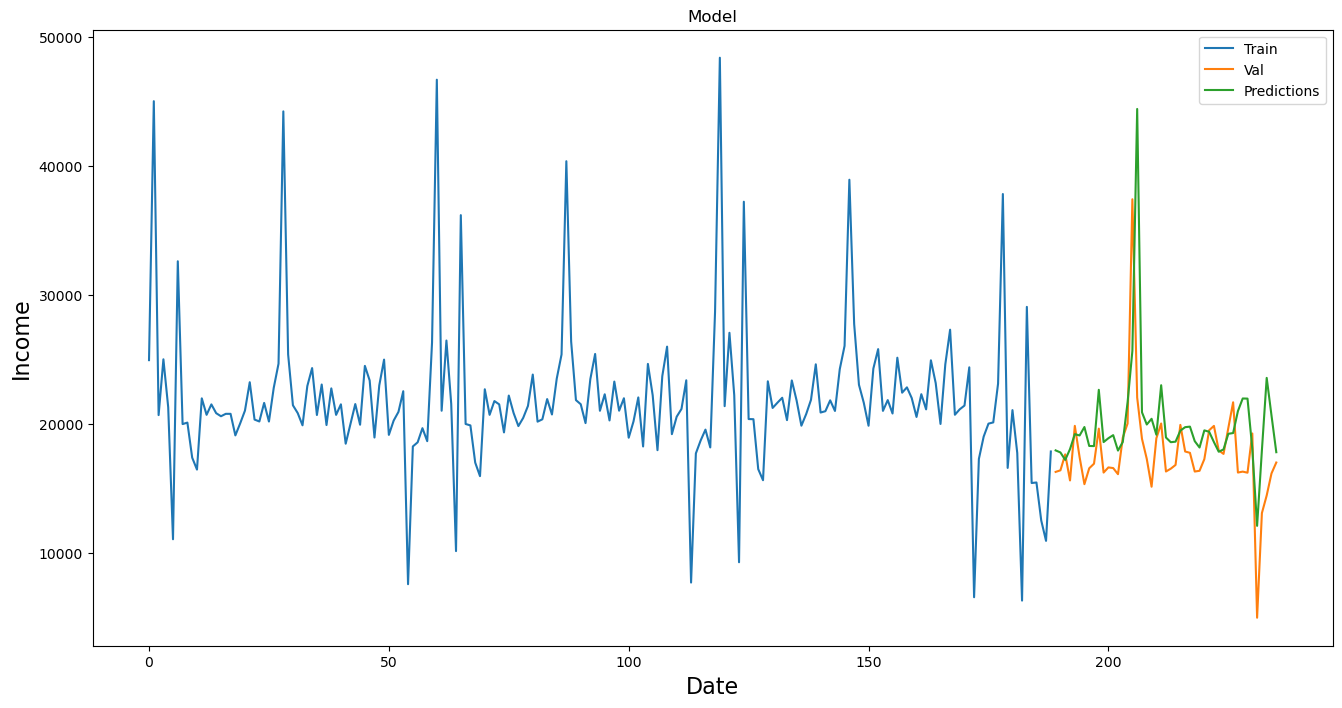

In [17]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualize the Data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.ylabel('Income', fontsize=16)
plt.xlabel('Date',fontsize=16)
plt.plot(train['income_amount'])
plt.plot(valid[['income_amount', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'])
plt.show()

In [18]:
# Show the valid and predicted incomes
valid

,income_amount,Predictions
189,16305,17973.738281
190,16428,17813.890625
191,17667,17234.898438
192,15644,18076.333984
193,19875,19232.958984
194,17443,19131.542969
195,15354,19785.187500
196,16585,18317.355469
197,16942,18306.962891
198,19660,22670.269531


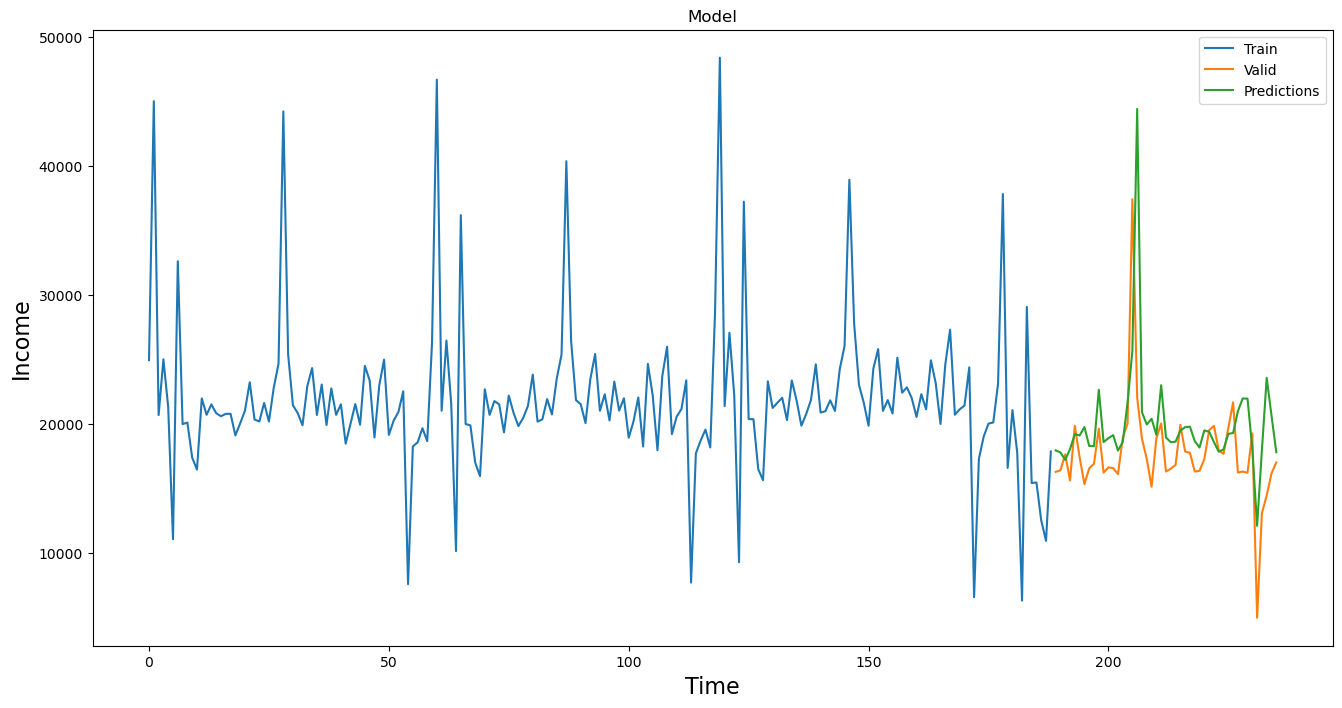

In [19]:
# Visualize the Data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.ylabel('Income', fontsize=16)
plt.xlabel('Time',fontsize=16)
plt.plot(train['income_amount'])
plt.plot(valid[['income_amount', 'Predictions']])
plt.legend(['Train', 'Valid', 'Predictions'])
plt.show()

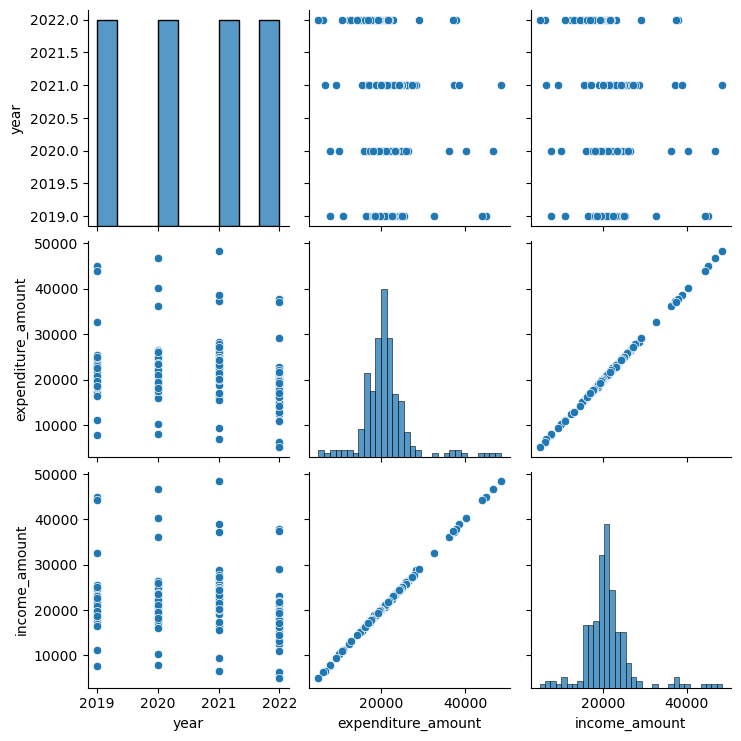

In [20]:
import seaborn as sns
df = df.drop(columns='id')
sns.pairplot(df)

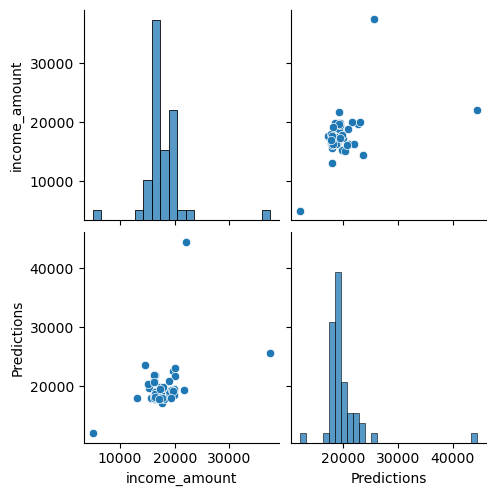

In [21]:
sns.pairplot(valid)

C:\Users\Logan\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='income_amount', ylabel='Density'>

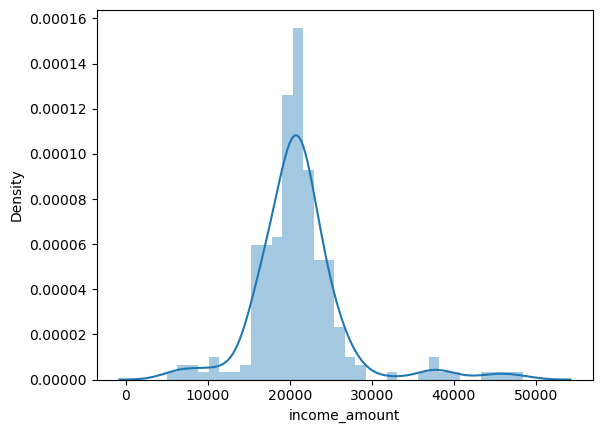

In [22]:
sns.distplot(df['income_amount'])

C:\Users\Logan\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:ylabel='Density'>

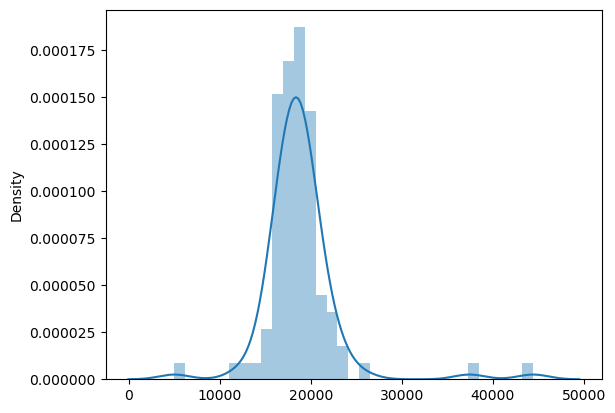

In [23]:
sns.distplot(valid)

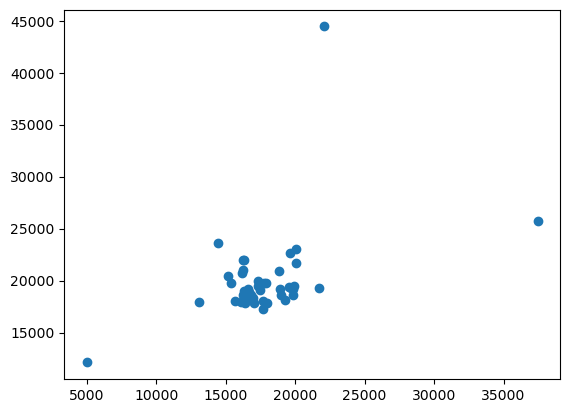

In [24]:
plt.scatter(y_test,predictions)

C:\Users\Logan\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


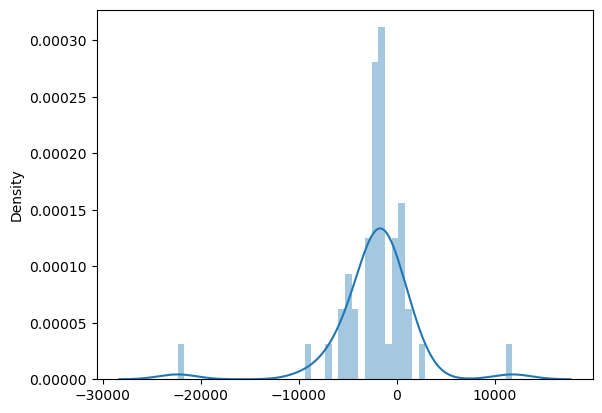

In [25]:
sns.distplot((y_test-predictions),bins=50);

In [26]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 3038.269281914894
MSE: 22746802.937264625
RMSE: 4769.360852070708


In [27]:
# Export to CSV
valid.to_csv('../Resources/valid_dataframe.csv', index=False)